<a href="https://colab.research.google.com/github/Sounak97/Assignment-5/blob/Sounak97/Sounak97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction to Pandas


In [177]:
from __future__ import print_function
import pandas as pd
pd.__version__

'0.22.0'

In [178]:
pd.Series(['San Francisco','San Jose','Sacramento'])#creating a Series object

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

DataFrame objects can be created by passing a dict mapping string column names to their respective Series. If the Series don't match in length, missing values are filled with special NA/NaN values.

In [179]:
city=pd.Series(['San Francisco','San Jose','Sacramento'])
#city=pd.Series(['San Francisco','San Jose','Sacramento','Los Angeles'])
population=pd.Series([100000,200000,300000])
#population=pd.Series([100000,200000,300000,400000])
pd.DataFrame({'City Name':city,'Population':population})

,City Name,Population
0,San Francisco,100000
1,San Jose,200000
2,Sacramento,300000


Loading an entire file into the Dataframe.E.g.:California Housing Dataset

In [180]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207300.9
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,115983.8
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,14999.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119400.0
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180400.0
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265000.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500001.0


In [181]:
california_housing_dataframe.head()#first few records

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66900.0
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80100.0
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85700.0
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73400.0
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65500.0


Studying distribution of values in the given datset using a histogram.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8ddc67e10>]],
      dtype=object)

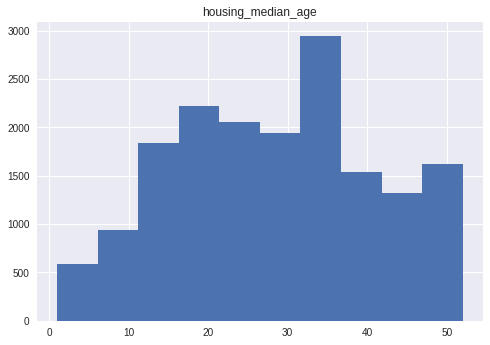

In [182]:
california_housing_dataframe.hist('housing_median_age')#any other feature column may be used in its place each will get a separate histogram
#california_housing_dataframe.hist('total_bedrooms')
#california_housing_dataframe.hist('population')

Accessing Data

In [183]:
towns=pd.DataFrame({'City Names':city,'Population':population})
print(type(towns['City Names']))
towns['City Names']

<class 'pandas.core.series.Series'>


0    San Francisco
1         San Jose
2       Sacramento
Name: City Names, dtype: object

In [184]:
print(type(towns['City Names'][1]))
towns['City Names'][1]

<class 'str'>


'San Jose'

In [185]:
print(type(towns[0:2]))
towns[0:2]

<class 'pandas.core.frame.DataFrame'>


,City Names,Population
0,San Francisco,100000
1,San Jose,200000


Manipulating Data

In [186]:
population/1000

0   100.0
1   200.0
2   300.0
dtype: float64

In [0]:
import numpy as np

In [188]:
np.log(population)

0   11.5
1   12.2
2   12.6
dtype: float64

In [0]:
#The example below creates a new Series that indicates whether population is over one million:

In [190]:
population.apply(lambda val: val>1000000)#can put any value

0    False
1    False
2    False
dtype: bool

In [191]:
#adding series into existing dataframe
towns['Area square miles']=pd.Series([34.52,67.98,99.98])
towns['Population Density']=towns['Population']/towns['Area square miles']
towns

,City Names,Population,Area square miles,Population Density
0,San Francisco,100000,34.5,2896.9
1,San Jose,200000,68.0,2942.0
2,Sacramento,300000,100.0,3000.6


EXERCISE 1

In [192]:
towns['Width_Saint_Name']=(towns['Area square miles']>50) & towns['City Names'].apply(lambda name: name.startswith('San'))
towns

,City Names,Population,Area square miles,Population Density,Width_Saint_Name
0,San Francisco,100000,34.5,2896.9,False
1,San Jose,200000,68.0,2942.0,True
2,Sacramento,300000,100.0,3000.6,False


Indexes
Both Series and DataFrame objects also define an index property that assigns an identifier value to each Series item or DataFrame row.

By default, at construction, pandas assigns index values that reflect the ordering of the source data. Once created, the index values are stable; that is, they do not change when data is reordered.

In [193]:
city.index

RangeIndex(start=0, stop=3, step=1)

In [194]:
towns.index

RangeIndex(start=0, stop=3, step=1)

In [195]:
towns.reindex([2,0,1])

,City Names,Population,Area square miles,Population Density,Width_Saint_Name
2,Sacramento,300000,100.0,3000.6,False
0,San Francisco,100000,34.5,2896.9,False
1,San Jose,200000,68.0,2942.0,True


In [196]:
#it is a good way to shuffle and randomize the data
towns.reindex(np.random.permutation(towns.index))

,City Names,Population,Area square miles,Population Density,Width_Saint_Name
0,San Francisco,100000,34.5,2896.9,False
2,Sacramento,300000,100.0,3000.6,False
1,San Jose,200000,68.0,2942.0,True


EXERCISE 2

In [197]:
towns.reindex([45,56,34,100])#any value can be put

,City Names,Population,Area square miles,Population Density,Width_Saint_Name
45,NaN,nan,nan,nan,NaN
56,NaN,nan,nan,nan,NaN
34,NaN,nan,nan,nan,NaN
100,NaN,nan,nan,nan,NaN


In [0]:
#FIRST STEPS WITH TENSORFLOW
from __future__ import print_function
import math
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset
tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows=10
pd.options.display.float_format='{:.1f}'.format


In [0]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")


We'll randomize the data, just to be sure not to get any pathological ordering effects that might harm the performance of Stochastic Gradient Descent. Additionally, we'll scale median_house_value to be in units of thousands, so it can be learned a little more easily with learning rates in a range that we usually use.

In [200]:
california_housing_dataframe = california_housing_dataframe.reindex(
    np.random.permutation(california_housing_dataframe.index))
california_housing_dataframe["median_house_value"] /= 1000.0
california_housing_dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
9024,-119.0,35.4,23.0,5624.0,1148.0,2842.0,1042.0,3.1,79.0
7964,-118.4,34.0,16.0,9728.0,2211.0,3026.0,1899.0,5.9,500.0
5530,-118.2,34.0,45.0,733.0,178.0,715.0,165.0,2.6,124.1
14779,-122.2,37.8,43.0,2430.0,502.0,1537.0,484.0,2.9,121.4
16814,-123.2,40.5,16.0,241.0,84.0,152.0,61.0,1.4,48.8
...,...,...,...,...,...,...,...,...,...
3476,-117.9,34.1,33.0,1788.0,456.0,1787.0,361.0,2.7,124.1
9461,-119.3,36.3,7.0,3433.0,626.0,1793.0,626.0,3.5,83.7
10058,-119.8,36.5,32.0,1393.0,276.0,999.0,245.0,2.0,76.8
5383,-118.2,33.9,34.0,1745.0,404.0,1084.0,410.0,3.3,220.5


EXAMINING THE DATA

In [201]:
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


BUILDING THE MODEL

In [0]:
#using linear regressor interface
#input feature:Total rooms
my_feature=california_housing_dataframe[['total_rooms']]
#configuring numeric feature column
feature_columns=[tf.feature_column.numeric_column('total_rooms')]
#shape becomes a 1D array which is default and need not be passed as an argument any longer

In [0]:
#defining target i.e. median house value
targets=california_housing_dataframe['median_house_value']

Configuring the LinearRegressor

In [0]:
#using Gradient Descent as the optimizer
my_optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.0000001)#settig learning rate
my_optimizer=tf.contrib.estimator.clip_gradients_by_norm(my_optimizer,5.0)
linear_regressor=tf.estimator.LinearRegressor(feature_columns=feature_columns,optimizer=my_optimizer)

Defining the input function

To import our California housing data into our LinearRegressor, we need to define an input function, which instructs TensorFlow how to preprocess the data, as well as how to batch, shuffle, and repeat it during model training.

First, we'll convert our pandas feature data into a dict of NumPy arrays. We can then use the TensorFlow Dataset API to construct a dataset object from our data, and then break our data into batches of batch_size, to be repeated for the specified number of epochs (num_epochs).

NOTE: When the default value of num_epochs=None is passed to repeat(), the input data will be repeated indefinitely.

Next, if shuffle is set to True, we'll shuffle the data so that it's passed to the model randomly during training. The buffer_size argument specifies the size of the dataset from which shuffle will randomly sample.

Finally, our input function constructs an iterator for the dataset and returns the next batch of data to the LinearRegressor.

In [0]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model of one feature.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
  
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
 
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
      ds = ds.shuffle(buffer_size=10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

TRAINING

In [0]:
_ = linear_regressor.train(
    input_fn = lambda:my_input_fn(my_feature, targets),
    steps=100
)

EVALUATING

In [207]:
# Create an input function for predictions.
# Note: Since we're making just one prediction for each example, we don't 
# need to repeat or shuffle the data here.
prediction_input_fn =lambda: my_input_fn(my_feature, targets, num_epochs=1, shuffle=False)

# Call predict() on the linear_regressor to make predictions.
predictions = linear_regressor.predict(input_fn=prediction_input_fn)

# Format predictions as a NumPy array, so we can calculate error metrics.
predictions = np.array([item['predictions'][0] for item in predictions])

# Print Mean Squared Error and Root Mean Squared Error.
mean_squared_error = metrics.mean_squared_error(predictions, targets)
root_mean_squared_error = math.sqrt(mean_squared_error)
print("Mean Squared Error (on training data): %0.3f" % mean_squared_error)
print("Root Mean Squared Error (on training data): %0.3f" % root_mean_squared_error)

Mean Squared Error (on training data): 56367.025
Root Mean Squared Error (on training data): 237.417


In [208]:
min_house_value = california_housing_dataframe["median_house_value"].min()
max_house_value = california_housing_dataframe["median_house_value"].max()
min_max_difference = max_house_value - min_house_value

print("Min. Median House Value: %0.3f" % min_house_value)
print("Max. Median House Value: %0.3f" % max_house_value)
print("Difference between Min. and Max.: %0.3f" % min_max_difference)
print("Root Mean Squared Error: %0.3f" % root_mean_squared_error)

Min. Median House Value: 14.999
Max. Median House Value: 500.001
Difference between Min. and Max.: 485.002
Root Mean Squared Error: 237.417


In [209]:
calibration_data = pd.DataFrame()
calibration_data["predictions"] = pd.Series(predictions)
calibration_data["targets"] = pd.Series(targets)
calibration_data.describe()

,predictions,targets
count,17000.0,17000.0
mean,0.1,207.3
std,0.1,116.0
min,0.0,15.0
25%,0.1,119.4
50%,0.1,180.4
75%,0.2,265.0
max,1.9,500.0


In [0]:
sample = california_housing_dataframe.sample(n=300)

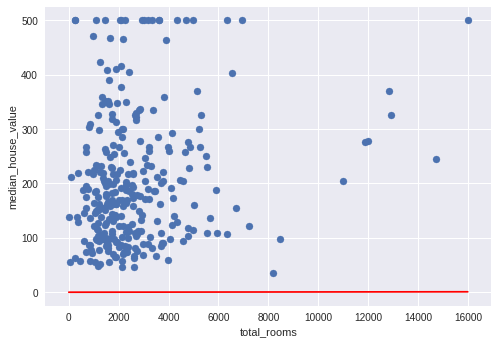

In [211]:
# Get the min and max total_rooms values.
x_0 = sample["total_rooms"].min()
x_1 = sample["total_rooms"].max()

# Retrieve the final weight and bias generated during training.
weight = linear_regressor.get_variable_value('linear/linear_model/total_rooms/weights')[0]
bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')

# Get the predicted median_house_values for the min and max total_rooms values.
y_0 = weight * x_0 + bias 
y_1 = weight * x_1 + bias

# Plot our regression line from (x_0, y_0) to (x_1, y_1).
plt.plot([x_0, x_1], [y_0, y_1], c='r')

# Label the graph axes.
plt.ylabel("median_house_value")
plt.xlabel("total_rooms")

# Plot a scatter plot from our data sample.
plt.scatter(sample["total_rooms"], sample["median_house_value"])

# Display graph.
plt.show()

Tweaking the model hyperparameters

In [0]:
def train_model(learning_rate, steps, batch_size, input_feature="total_rooms"):
  """Trains a linear regression model of one feature.
  
  Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    input_feature: A `string` specifying a column from `california_housing_dataframe`
      to use as input feature.
  """
  
  periods = 10
  steps_per_period = steps / periods

  my_feature = input_feature
  my_feature_data = california_housing_dataframe[[my_feature]]
  my_label = "median_house_value"
  targets = california_housing_dataframe[my_label]

  # Create feature columns.
  feature_columns = [tf.feature_column.numeric_column(my_feature)]
  
  # Create input functions.
  training_input_fn = lambda:my_input_fn(my_feature_data, targets, batch_size=batch_size)
  prediction_input_fn = lambda: my_input_fn(my_feature_data, targets, num_epochs=1, shuffle=False)
  
  # Create a linear regressor object.
  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=feature_columns,
      optimizer=my_optimizer
  )

  # Set up to plot the state of our model's line each period.
  plt.figure(figsize=(15, 6))
  plt.subplot(1, 2, 1)
  plt.title("Learned Line by Period")
  plt.ylabel(my_label)
  plt.xlabel(my_feature)
  sample = california_housing_dataframe.sample(n=300)
  plt.scatter(sample[my_feature], sample[my_label])
  colors = [cm.coolwarm(x) for x in np.linspace(-1, 1, periods)]

  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("RMSE (on training data):")
  root_mean_squared_errors = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    linear_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period
    )
    # Take a break and compute predictions.
    predictions = linear_regressor.predict(input_fn=prediction_input_fn)
    predictions = np.array([item['predictions'][0] for item in predictions])
    
    # Compute loss.
    root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(predictions, targets))
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, root_mean_squared_error))
    # Add the loss metrics from this period to our list.
    root_mean_squared_errors.append(root_mean_squared_error)
    # Finally, track the weights and biases over time.
    # Apply some math to ensure that the data and line are plotted neatly.
    y_extents = np.array([0, sample[my_label].max()])
    
    weight = linear_regressor.get_variable_value('linear/linear_model/%s/weights' % input_feature)[0]
    bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')

    x_extents = (y_extents - bias) / weight
    x_extents = np.maximum(np.minimum(x_extents,
                                      sample[my_feature].max()),
                           sample[my_feature].min())
    y_extents = weight * x_extents + bias
    plt.plot(x_extents, y_extents, color=colors[period]) 
  print("Model training finished.")

  # Output a graph of loss metrics over periods.
  plt.subplot(1, 2, 2)
  plt.ylabel('RMSE')
  plt.xlabel('Periods')
  plt.title("Root Mean Squared Error vs. Periods")
  plt.tight_layout()
  plt.plot(root_mean_squared_errors)

  # Output a table with calibration data.
  calibration_data = pd.DataFrame()
  calibration_data["predictions"] = pd.Series(predictions)
  calibration_data["targets"] = pd.Series(targets)
  display.display(calibration_data.describe())

  print("Final RMSE (on training data): %0.2f" % root_mean_squared_error)

TASK 1

Training model...
RMSE (on training data):
  period 00 : 236.32
  period 01 : 235.11
  period 02 : 233.90
  period 03 : 232.70
  period 04 : 231.50
  period 05 : 230.31
  period 06 : 229.13
  period 07 : 227.96
  period 08 : 226.79
  period 09 : 225.63
Model training finished.


,predictions,targets
count,17000.0,17000.0
mean,13.2,207.3
std,10.9,116.0
min,0.0,15.0
25%,7.3,119.4
50%,10.6,180.4
75%,15.8,265.0
max,189.7,500.0


Final RMSE (on training data): 225.63
Training model...
RMSE (on training data):
  period 00 : 225.63
  period 01 : 214.42
  period 02 : 204.04
  period 03 : 194.97
  period 04 : 186.92
  period 05 : 180.80
  period 06 : 175.88
  period 07 : 171.74
  period 08 : 169.08
  period 09 : 167.44
Model training finished.


,predictions,targets
count,17000.0,17000.0
mean,115.8,207.3
std,95.5,116.0
min,0.1,15.0
25%,64.1,119.4
50%,93.2,180.4
75%,138.1,265.0
max,1662.4,500.0


Final RMSE (on training data): 167.44


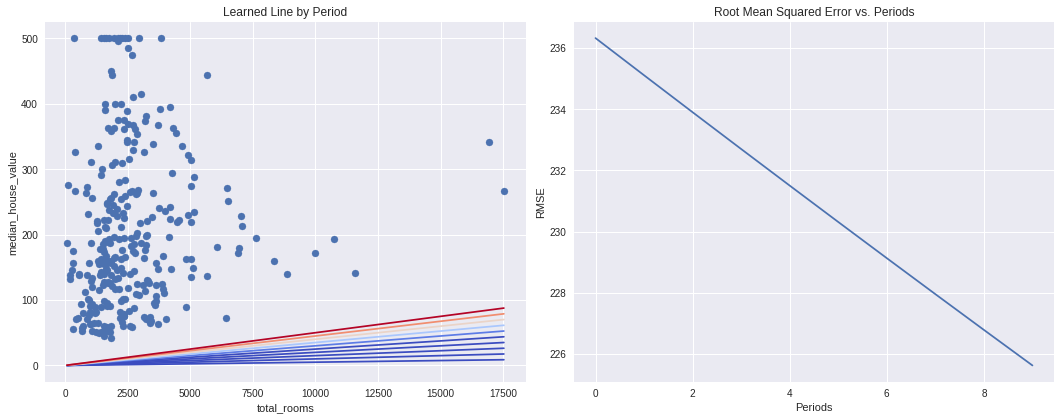

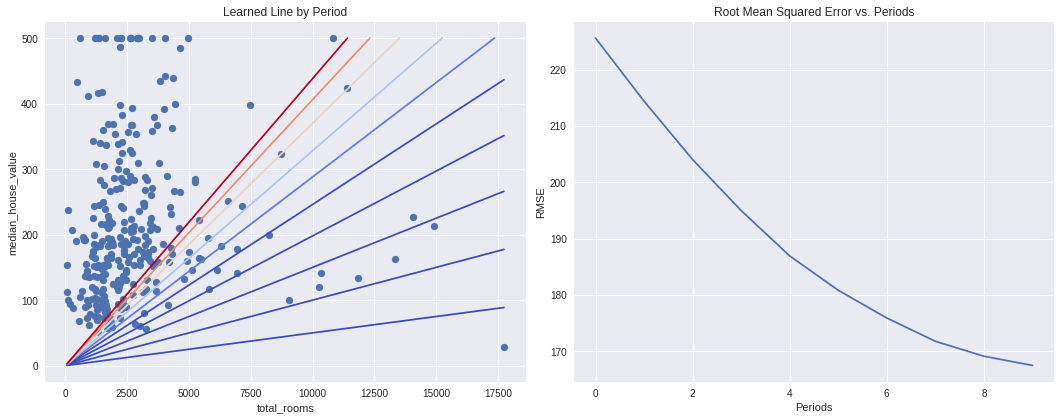

In [213]:
train_model(
    learning_rate=0.00001,
    steps=100,
    batch_size=1
)
train_model(
    learning_rate=0.00002,
    steps=500,
    batch_size=5
)


TASK 2

Training model...
RMSE (on training data):
  period 00 : 225.63
  period 01 : 214.42
  period 02 : 204.04
  period 03 : 194.62
  period 04 : 186.92
  period 05 : 180.80
  period 06 : 176.10
  period 07 : 172.44
  period 08 : 169.46
  period 09 : 167.79
Model training finished.


,predictions,targets
count,17000.0,17000.0
mean,113.7,207.3
std,93.7,116.0
min,0.1,15.0
25%,62.9,119.4
50%,91.5,180.4
75%,135.5,265.0
max,1631.3,500.0


Final RMSE (on training data): 167.79


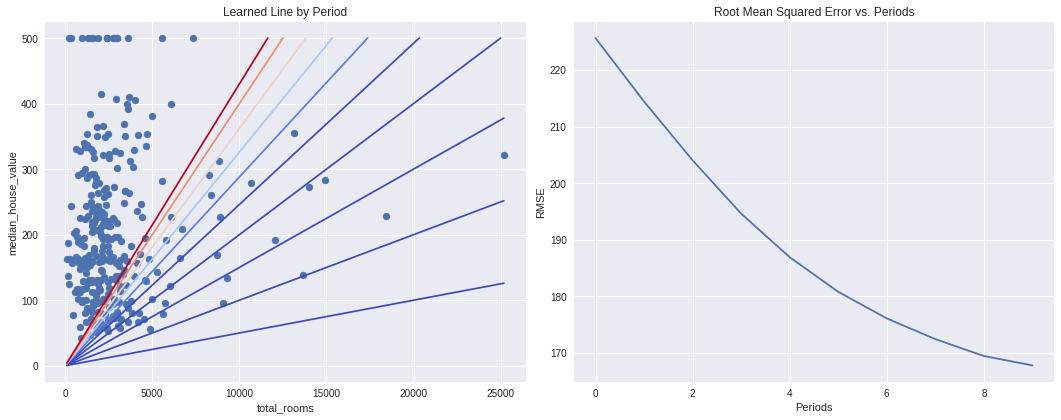

In [214]:
train_model(
    learning_rate=0.00002,
    steps=500,
    batch_size=5
)

Training model...
RMSE (on training data):
  period 00 : 225.63
  period 01 : 214.62
  period 02 : 205.05
  period 03 : 196.92
  period 04 : 190.21
  period 05 : 184.90
  period 06 : 181.63
  period 07 : 178.74
  period 08 : 177.12
  period 09 : 176.22
Model training finished.


,predictions,targets
count,17000.0,17000.0
mean,116.4,207.3
std,93.4,116.0
min,0.2,15.0
25%,64.3,119.4
50%,95.0,180.4
75%,140.1,265.0
max,2904.6,500.0


Final RMSE (on training data): 176.22


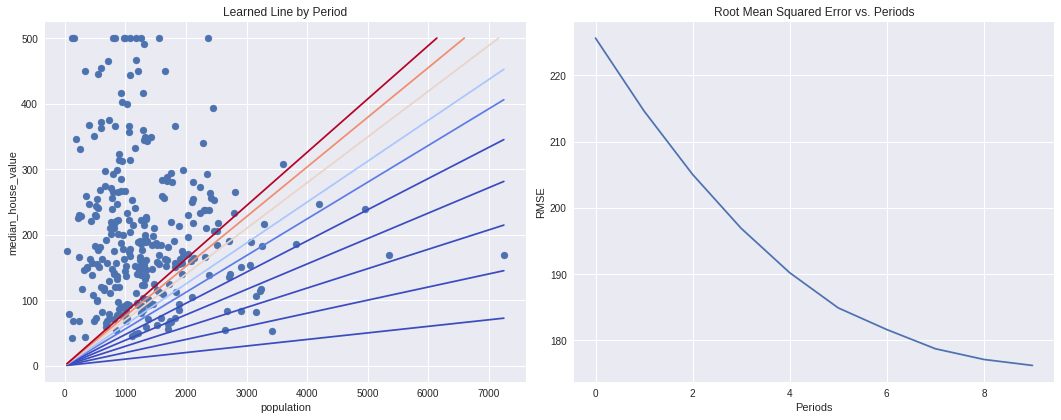

In [215]:
train_model(
    learning_rate=0.00002,
    steps=1000,
    batch_size=5,
    input_feature="population"
)